In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
creditos= pd.read_csv('Casocreditos.csv')

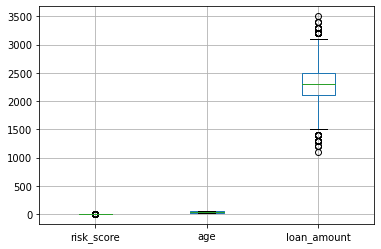

In [4]:
boxplot = creditos.boxplot(column=['risk_score','age','loan_amount'])  

<AxesSubplot:ylabel='Frequency'>

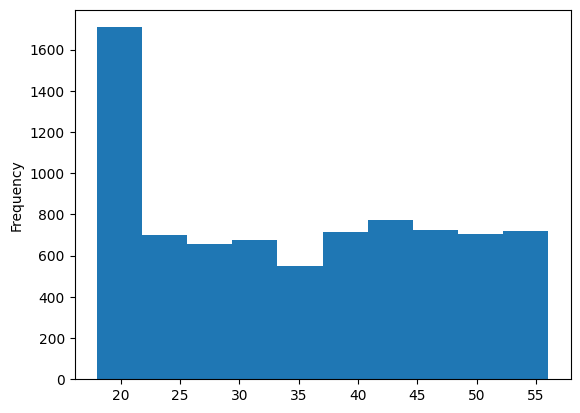

In [5]:
creditos['age'].plot(kind='hist')

**CLUSTERS**

In [6]:
df_iris= pd.read_csv('iris.csv')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

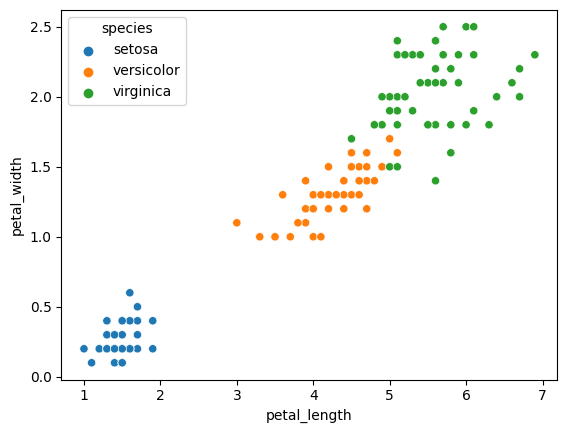

In [7]:
sns.scatterplot(data=df_iris,
                x='petal_length',
                y='petal_width',
                hue='species')


In [8]:
from scipy.cluster import hierarchy

In [9]:
iris_subset=df_iris.sample(20)

In [10]:
Z=hierarchy.linkage(iris_subset.drop('species',axis=1),'ward')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [15.0, 15.0, 40.0, 40.0],
  [5.0, 5.0, 27.5, 27.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [112.5, 112.5, 142.5, 142.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [127.5, 127.5, 173.75, 173.75],
  [73.75, 73.75, 150.625, 150.625],
  [16.25, 16.25, 112.1875, 112.1875]],
 'dcoord': [[0.0, 0.14142135623730995, 0.14142135623730995, 0.0],
  [0.0, 0.5099019513592781, 0.5099019513592781, 0.0],
  [0.14142135623730995,
   0.9219544457292885,
   0.9219544457292885,
   0.5099019513592781],
  [0.0, 1.3992855319769446, 1.3992855319769446, 0.9219544457292885],
  [0.0, 1.7431771759252317, 1.7431771759252317, 1.3992855319769446],
  [0.0, 0.2999999999999998, 0.2999999999999998, 0.0

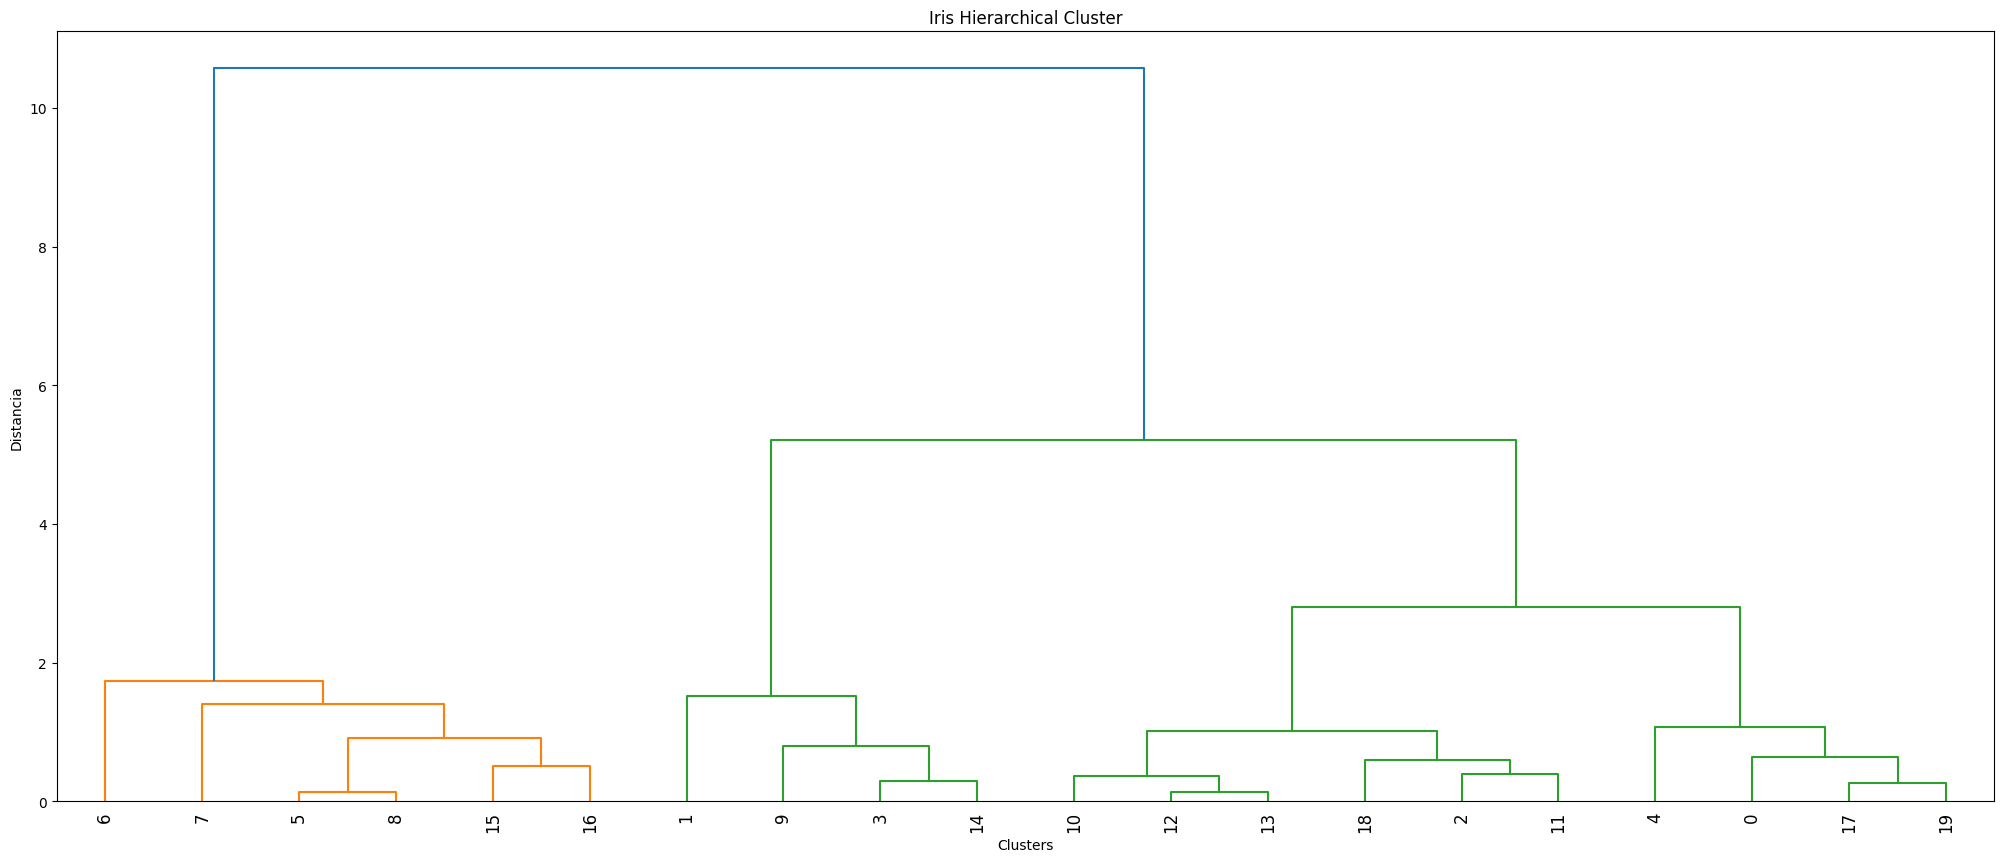

In [11]:
plt.figure(figsize=(25,10))
plt.title('Iris Hierarchical Cluster')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
hierarchy.dendrogram(Z,leaf_rotation=90)

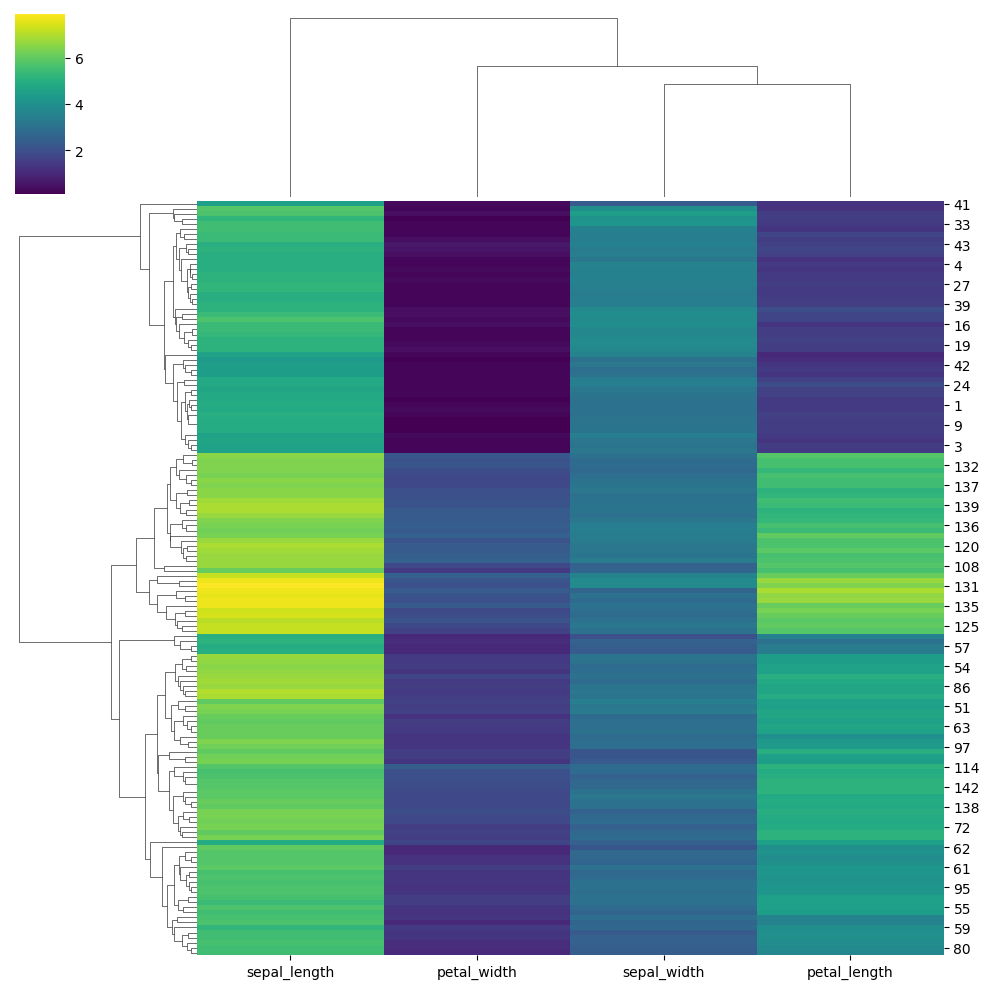

In [12]:
sns.clustermap(df_iris.drop('species',axis=1), cmap='viridis')

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
#Clustering aglomerativo
x=iris_subset.drop('species',axis=1)

In [15]:
hcluster=AgglomerativeClustering(n_clusters=2,
                                affinity='euclidean',
                                linkage='ward')

hcluster.fit_predict(x[['petal_length','petal_width']])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

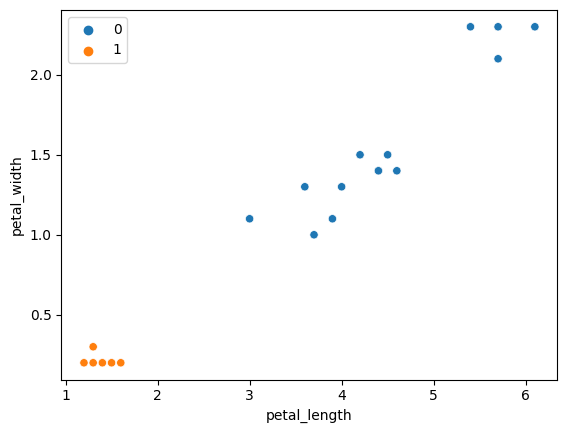

In [16]:
sns.scatterplot(data=x,
                x='petal_length',
                y='petal_width',
                hue=hcluster.fit_predict(x[['petal_length','petal_width']]))

***K means clustering no jerarquico***

In [17]:
from sklearn.cluster import KMeans

var=[]

for k in range(1,11):
    kmeansTest=KMeans(n_clusters=k)
    kmeansTest.fit(x)

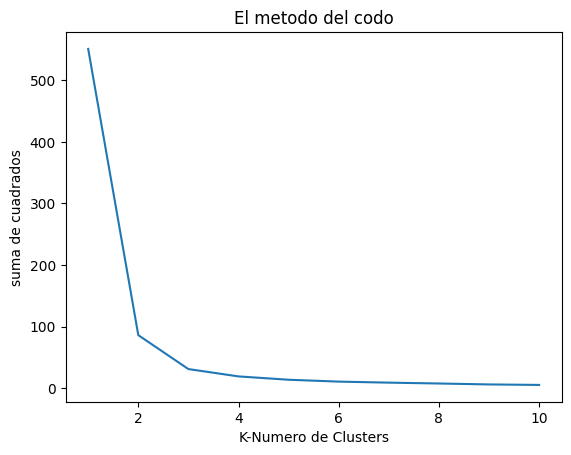

In [18]:
from sklearn.cluster import KMeans

squared_sum=[]
data=df_iris.drop('species',axis=1)
data=data[['petal_length','petal_width']]
for k in range (1,11):
    kmeans_test=KMeans(n_clusters=k)
    kmeans_test.fit(data)
    squared_sum.append(kmeans_test.inertia_)


plt.plot(range(1,11),squared_sum)
plt.title('El metodo del codo')
plt.xlabel('K-Numero de Clusters')
plt.ylabel('suma de cuadrados')
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3)
kmeans_labels=kmeans.fit_predict(data)
print(kmeans_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

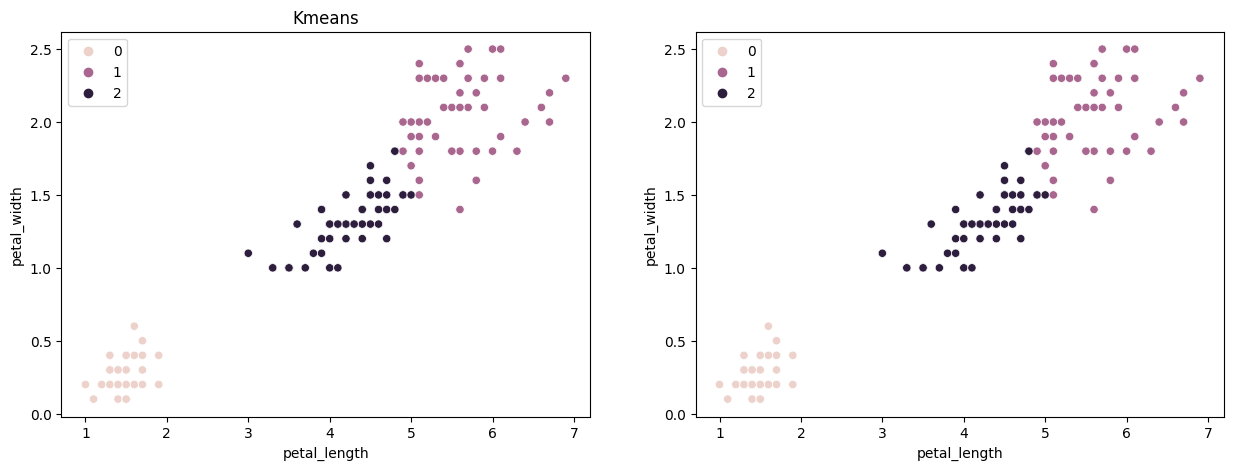

In [20]:
fig,axes=plt.subplots(1,2, figsize=(15,5))
axes[0].set_title('Datos Originales')
axes[0].set_title('Kmeans')

sns.scatterplot(ax=axes[0],
                data=df_iris,
                x='petal_length',
                y='petal_width',
                hue=kmeans_labels)

sns.scatterplot(ax=axes[1],
                data=data,
                x='petal_length',
                y='petal_width',
                hue=kmeans_labels)

In [29]:
replace_dict={
    'setosa':0,
    'virginica':1,
    'versicolos':2,
}

df_iris_int_labels=df_iris.replace(replace_dict)

<AxesSubplot:>

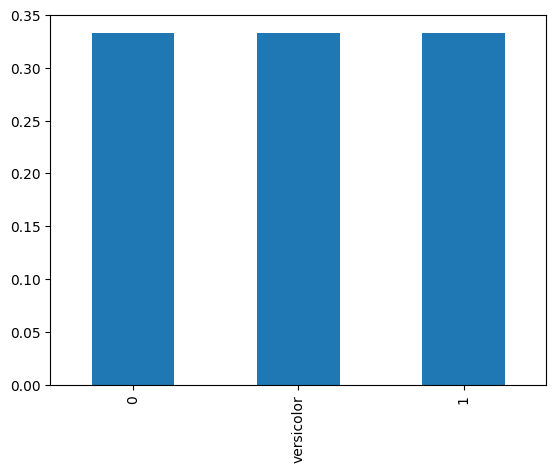

In [30]:
from dataclasses import replace


iris_summary=df_iris['species'].replace(replace_dict)
iris_summary.value_counts(normalize=True).plot(kind='bar')



<AxesSubplot:>

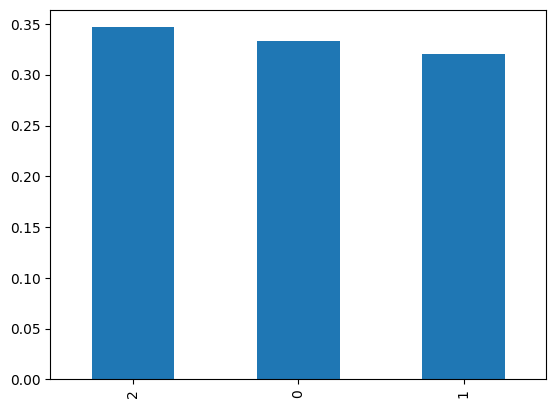

In [23]:
df_iris_kmeans=data.copy()
df_iris_kmeans['kmean_labels']=kmeans_labels
df_iris_kmeans['kmean_labels'].value_counts(normalize=True).plot(kind='bar')


In [38]:
#Comparar cluster jerarquico con kmeans

from sklearn.metrics.cluster import adjusted_rand_score
print('RAND Score - Hierarchical Cluster')
print(adjusted_rand_score(labels_true = df_iris_int_labels['species'],
                          labels_pred= df_iris_kmeans['kmean_labels']))

RAND Score - Hierarchical Cluster


TypeError: '<' not supported between instances of 'str' and 'int'

In [40]:
print('RAND Score - Hierarchical Cluster')
print(adjusted_rand_score(labels_true = df_iris_int_labels['species'],
                          labels_pred= hcluster.fit_predict(data)))

## Poca similitud entre los dos tipos de clusters

RAND Score - Hierarchical Cluster


TypeError: '<' not supported between instances of 'str' and 'int'